In [1]:
!pip install opencv-python

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


The type of this input is <class 'numpy.ndarray'>
Shape: (1850, 2960, 3)


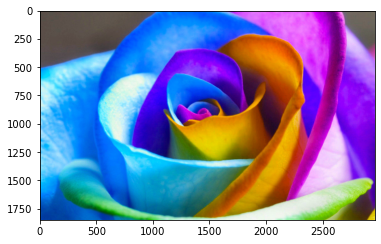

In [3]:
image = cv2.imread('colorful.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

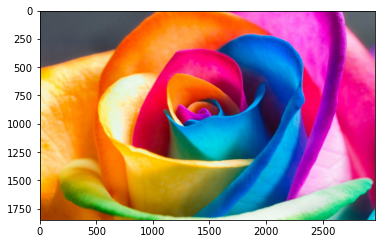

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

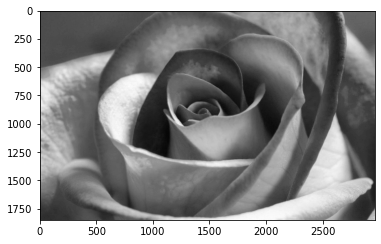

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

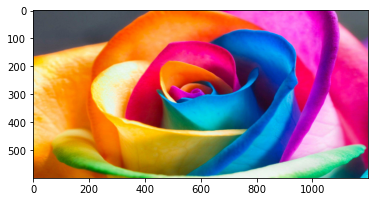

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([246.13155663,  82.74003634,   7.81514234]),
 array([74.55679785, 79.3255814 , 88.65742397]),
 array([229.56056499, 241.56270509, 225.12512484]),
 array([242.68781367,   2.40277957, 101.81971432]),
 array([ 94.95464853, 149.3446712 , 228.51247166]),
 array([252.47900078, 206.95175644, 107.04059329]),
 array([  1.46176471, 143.79248366, 183.44117647]),
 array([201.31719484, 155.46038732,   4.68089789]),
 array([252.93328739, 101.69152309, 230.16636802]),
 array([ 61.32794118,  49.34779412, 190.98897059]),
 array([223.2314239 ,   6.6193126 , 196.07823241]),
 array([225.04040106,   2.81509879,  57.84193453]),
 array([252.01314041, 153.63339731,  55.22619223]),
 array([46.41827411, 20.69568528, 58.19060914]),
 array([174.34424696,  66.89476146,   2.77057998]),
 array([179.6818542 , 227.13946117, 190.57567353]),
 array([252.3058329 , 142.93431424,   4.50257488]),
 array([ 12.2361809 , 196.38274707, 123.75963149]),
 array([247.84357331,  10.94044478, 138.55170248]),
 array([204.600893

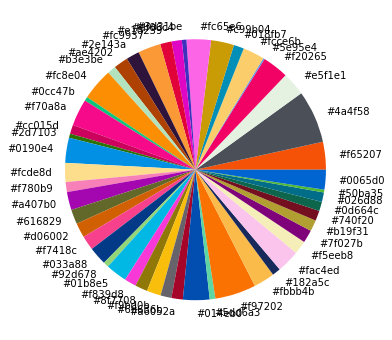

In [39]:
get_colors(get_image('colorful.jpg'), 50, True)

In [44]:
IMAGE_DIRECTORY = 'mubeena'
COLORS = {
    'RED':[255, 0, 0],
        'GREEN':[0, 255, 0],
        'WHITE':[255,255,255],
        'MAGNETA':[255,0,255],
        'LIGHTPINK':[255,182,193],
        'ORANGE':[255,165,0],
        'YELLOW':[255,255,0],
        'LEAF GREEN':[0,128,0]
}


images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

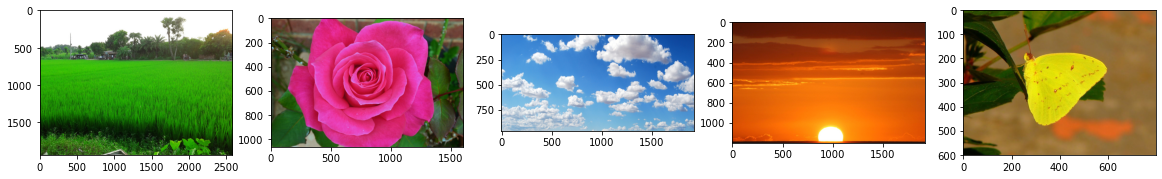

In [45]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [46]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [47]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

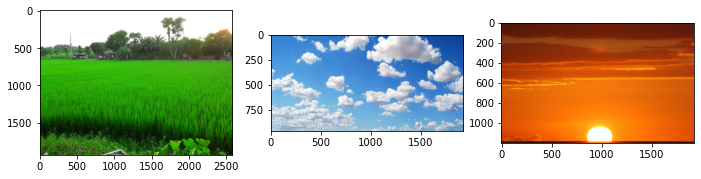

In [48]:
# Search for WHITE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['WHITE'], 60, 5)

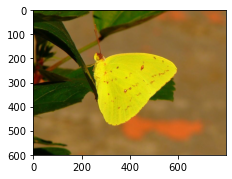

In [49]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

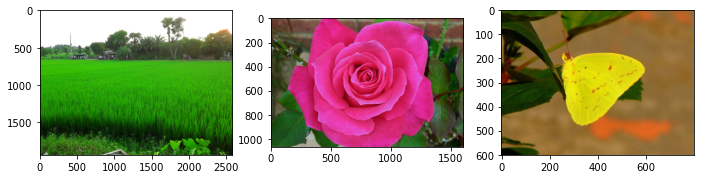

In [50]:
# Search for LEAF GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['LEAF GREEN'], 60, 5)